In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/events_processed.csv')
data.head()

C:\Users\EliteBook 640 G11\AppData\Local\Temp\ipykernel_15444\1884128747.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/events_processed.csv')


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,year,month,day,quarter,week,weekday,dayofyear,category,sub_category,sub_sub_category,sub_sub_sub_category
0,2020-09-24 11:57:06+00:00,view,1996170,2144415922528452715,electronics.telephone,unknown,31.90,1515915625519388267,LJuJVLEjPT,2020,9,24,3,39,3,268,electronics,telephone,0,0
1,2020-09-24 11:57:26+00:00,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY,2020,9,24,3,39,3,268,computers,components,cooler,0
2,2020-09-24 11:57:27+00:00,view,215454,2144415927158964449,unknown,unknown,9.81,1515915625513238515,4TMArHtXQy,2020,9,24,3,39,3,268,unknown,0,0,0
3,2020-09-24 11:57:33+00:00,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08,2020,9,24,3,39,3,268,computers,peripherals,printer,0
4,2020-09-24 11:57:36+00:00,view,3658723,2144415921169498184,unknown,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ,2020,9,24,3,39,3,268,unknown,0,0,0


In [3]:
data['event_time'] = pd.to_datetime(data['event_time'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884964 entries, 0 to 884963
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   event_time            884964 non-null  datetime64[ns, UTC]
 1   event_type            884964 non-null  object             
 2   product_id            884964 non-null  int64              
 3   category_id           884964 non-null  int64              
 4   category_code         884964 non-null  object             
 5   brand                 884964 non-null  object             
 6   price                 884964 non-null  float64            
 7   user_id               884964 non-null  int64              
 8   user_session          884964 non-null  object             
 9   year                  884964 non-null  int64              
 10  month                 884964 non-null  int64              
 11  day                   884964 non-null  int64        

## Phân tích conversion rate (tỷ lệ chuyển đổi)

### Tỉ lệ chuyển đổi tổng thể từ view sang purchase

In [4]:
def calc_conversion_rate(df):
    views = df[df['event_type'] == 'view']
    purchases = df[df['event_type'] == 'purchase']
    return (len(purchases) / len(views) * 100) if len(views) > 0 else 0

conversion_rate_overall = calc_conversion_rate(data)
print(f"Tỷ lệ chuyển đổi tổng thể: {conversion_rate_overall:.2f} %")

Tỷ lệ chuyển đổi tổng thể: 4.71 %


Tỷ lệ chuyển đổi tổng thể `4.71%` là `khá tốt`. Với ngành `thương mại điện tử`, conversion rate trung bình thường rơi vào khoảng `2%–3%`. Con số 4.71% thể hiện hiệu quả tương đối cao trong việc chuyển đổi từ người xem thành người mua hàng.

Đây là dấu hiệu tích cực cho thấy `hiệu quả` của UX/UI, quảng cáo hoặc chất lượng sản phẩm.

### Conversion rate thay đổi như thế nào theo thời gian

In [5]:
data['hour'] = data['event_time'].dt.hour
conversion_by_month = data.groupby('month').apply(calc_conversion_rate)
conversion_by_week = data.groupby('week').apply(calc_conversion_rate)
conversion_by_day = data.groupby('day').apply(calc_conversion_rate)
conversion_by_hour = data.groupby('hour').apply(calc_conversion_rate)

C:\Users\EliteBook 640 G11\AppData\Local\Temp\ipykernel_15444\2326982566.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  conversion_by_month = data.groupby('month').apply(calc_conversion_rate)
C:\Users\EliteBook 640 G11\AppData\Local\Temp\ipykernel_15444\2326982566.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  conversion_by_week = data.groupby('week').apply(calc_conversion_rate)
C:\Users\EliteBook

#### Conversion rate thay đổi theo tháng

In [6]:
custom_month_order = [9, 10, 11, 12, 1, 2]
conversion_by_month = conversion_by_month.loc[custom_month_order]

print("Tỷ lệ chuyển đổi theo tháng:")
print(conversion_by_month.round(2).reset_index(name='Conversion Rate (%)').to_string(index=False))

Tỷ lệ chuyển đổi theo tháng:
 month  Conversion Rate (%)
     9                 3.93
    10                 4.28
    11                 4.45
    12                 4.77
     1                 4.99
     2                 5.17


In [7]:
import plotly.graph_objects as go

months = conversion_by_month.index.astype(str)
rates = conversion_by_month.round(2).values / 100 

fig = go.Figure()

fig.add_trace(go.Bar(
    x=months,
    y=rates,
    name='Tỷ lệ chuyển đổi',
    marker_color='#0e4f66',
    width=0.4,
))

fig.add_trace(go.Scatter(
    x=months,
    y=rates,
    mode='lines+markers',
    name='Đường xu hướng',
    line=dict(color="gray", width=2.5),
    marker=dict(color="gray", size=8),
))

fig.update_layout(
    title='Tỷ lệ chuyển đổi theo tháng từ View sang Purchase',
    title_font=dict(size=20, family="serif", color="#323232", weight="bold"),
    yaxis_tickformat=".2%",
    xaxis_title="Tháng",
    yaxis_title="Tỷ lệ chuyển đổi (%)",
    plot_bgcolor="#fbfbfb",
    font=dict(family="Arial, sans-serif"),
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=True, gridcolor='gray', gridwidth=0.5),
)

fig.show()

Ta thấy xu hướng `tăng trưởng dần` theo thời gian từ tháng 9 → tháng 2, cho thấy xu hướng:

- Người dùng có xu hướng `mua sắm nhiều hơn` vào `cuối năm` và `đầu năm` (dịp lễ, Tết).

- Tháng 9 có tỷ lệ thấp nhất → cần cải thiện khuyến mãi, chiến dịch marketing, tối ưu UI/UX.

#### Conversion rate theo tuần

In [8]:
custom_week_order = [39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 1, 2, 3, 4, 5, 6, 7, 8]
conversion_by_week = conversion_by_week.loc[custom_week_order]

print("Tỷ lệ chuyển đổi theo tuần:")
print(conversion_by_week.round(2).reset_index(name='Conversion Rate (%)').to_string(index=False))

Tỷ lệ chuyển đổi theo tuần:
 week  Conversion Rate (%)
   39                 3.65
   40                 4.18
   41                 4.59
   42                 4.25
   43                 4.29
   44                 4.13
   45                 4.29
   46                 4.89
   47                 4.16
   48                 4.41
   49                 4.30
   50                 4.67
   51                 5.13
   52                 4.87
   53                 4.73
    1                 4.57
    2                 5.02
    3                 5.42
    4                 5.10
    5                 4.75
    6                 5.29
    7                 5.55
    8                 5.10


In [9]:
weeks = conversion_by_week.index.astype(str)
rates = conversion_by_week.round(2).values / 100

fig = go.Figure()

fig.add_trace(go.Bar(
    x=weeks,
    y=rates,
    name='Tỷ lệ chuyển đổi',
    marker_color='#0e4f66',
    width=0.4,
))

fig.add_trace(go.Scatter(
    x=weeks,
    y=rates,
    mode='lines+markers',
    name='Đường xu hướng',
    line=dict(color="gray", width=2.5),
    marker=dict(color="gray", size=8),
))

fig.update_layout(
    title='Tỷ lệ chuyển đổi theo tuần từ View sang Purchase',
    title_font=dict(size=20, family="serif", color="#323232", weight="bold"), 
    yaxis_tickformat=".2%", 
    xaxis_title="Tuần",
    yaxis_title="Tỷ lệ chuyển đổi",
    plot_bgcolor="#fbfbfb",
    font=dict(family="Arial, sans-serif"),
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=True, gridcolor='gray', gridwidth=0.5),
    xaxis_tickvals=weeks,  
)

fig.show()

- Tỷ lệ chuyển đổi theo tuần dao động ổn định quanh mức 4% – 5.5%
→ Cho thấy hiệu quả giữ vững, không có biến động lớn bất thường.

- Xu hướng chung có chiều hướng `tăng nhẹ`
→ Đặc biệt từ `tuần 1` đến `tuần 7`, tỷ lệ chuyển đổi có sự cải thiện rõ rệt, đạt đỉnh khoảng `5.5%` ở `tuần 7`.

- Giai đoạn `thấp nhất` rơi vào `tuần 39` (dưới 4%)
→ Cần xem xét nguyên nhân: có thể do ít chiến dịch, thời điểm ít mua sắm, hoặc thay đổi thuật toán phân phối.

#### Conversion rate theo ngày

In [10]:
print("Tỷ lệ chuyển đổi theo ngày:")
print(conversion_by_day.round(2).reset_index(name='Conversion Rate (%)').to_string(index=False))

Tỷ lệ chuyển đổi theo ngày:
 day  Conversion Rate (%)
   1                 4.48
   2                 4.32
   3                 4.15
   4                 4.31
   5                 4.40
   6                 4.52
   7                 4.76
   8                 4.96
   9                 4.77
  10                 4.54
  11                 5.04
  12                 5.09
  13                 4.90
  14                 4.99
  15                 4.39
  16                 4.77
  17                 4.87
  18                 5.14
  19                 4.75
  20                 4.99
  21                 4.99
  22                 4.60
  23                 5.05
  24                 5.06
  25                 4.60
  26                 4.53
  27                 4.63
  28                 4.68
  29                 4.31
  30                 4.47
  31                 4.53


In [11]:
days = conversion_by_day.index.astype(str)
rates = conversion_by_day.round(2).values / 100

fig = go.Figure()

fig.add_trace(go.Bar(
    x=days,
    y=rates,
    name='Tỷ lệ chuyển đổi',
    marker_color='#0e4f66',
    width=0.4,
))

fig.add_trace(go.Scatter(
    x=days,
    y=rates,
    mode='lines+markers',
    name='Đường xu hướng',
    line=dict(color="gray", width=2.5),
    marker=dict(color="gray", size=8),
))

fig.update_layout(
    title='Tỷ lệ chuyển đổi theo ngày từ View sang Purchase',
    title_font=dict(size=20, family="serif", color="#323232", weight="bold"),  
    yaxis_tickformat=".2%",
    xaxis_title="Ngày",
    yaxis_title="Tỷ lệ chuyển đổi",
    plot_bgcolor="#fbfbfb",
    font=dict(family="Arial, sans-serif"),
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=True, gridcolor='gray', gridwidth=0.5),
    xaxis_tickvals=days,  
)

fig.show()

- Tỷ lệ chuyển đổi hàng ngày dao động quanh mức `4.2% – 5.1%`
→ Mức chuyển đổi `khá ổn định`, không có ngày nào giảm mạnh đột ngột.

- `Ngày 8` và `ngày 18` có tỷ lệ `cao nhất` (~4.96 – 5.14%)
→ Có thể trùng với dịp khuyến mãi, quảng cáo mạnh hoặc chiến dịch hiệu quả.

- Một vài ngày có dấu hiệu `giảm nhẹ` như ngày `3, 15, 23 và 29` (~4.2%)
→ Nên kiểm tra lại chiến lược nội dung hoặc quảng cáo trong các ngày này.

#### Conversion rate theo giờ trong ngày

In [12]:
print("Tỷ lệ chuyển đổi theo giờ trong ngày:")
print(conversion_by_hour.round(2).reset_index(name='Conversion Rate (%)').to_string(index=False))

Tỷ lệ chuyển đổi theo giờ trong ngày:
 hour  Conversion Rate (%)
    0                 3.86
    1                 3.61
    2                 3.97
    3                 4.17
    4                 4.14
    5                 4.35
    6                 4.77
    7                 4.76
    8                 4.96
    9                 5.29
   10                 5.38
   11                 5.24
   12                 4.86
   13                 4.77
   14                 4.89
   15                 4.46
   16                 4.48
   17                 4.48
   18                 4.27
   19                 4.73
   20                 4.61
   21                 4.45
   22                 4.54
   23                 4.32


In [13]:
hours = conversion_by_hour.index.astype(str)
rates = conversion_by_hour.round(2).values / 100

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=hours,
    y=rates,
    mode='lines+markers',
    name='Tỷ lệ chuyển đổi',
    line=dict(color="#0e4f66", width=2.5),
    marker=dict(color="#0e4f66", size=8),
))

fig.update_layout(
    title='Tỷ lệ chuyển đổi theo giờ trong ngày',
    title_font=dict(size=20, family="serif", color="#323232", weight="bold"),  
    yaxis_tickformat=".2%",  
    xaxis_title="Giờ trong ngày",
    yaxis_title="Tỷ lệ chuyển đổi",
    plot_bgcolor="#fbfbfb",
    font=dict(family="Arial, sans-serif"),
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=True, gridcolor='gray', gridwidth=0.5),
    xaxis_tickvals=hours,  
)

fig.show()

- Tỷ lệ chuyển đổi `thấp nhất` xảy ra vào khoảng `1 giờ sáng` (~3.61%).

- Tỷ lệ chuyển đổi `cao nhất` rơi vào khoảng `10 giờ sáng` (~5.38%).

- `Sau 10h sáng`, tỷ lệ bắt đầu `giảm dần`, dao động nhẹ vào buổi chiều và tối.

- Từ `16h đến 23h`, tỷ lệ `ổn định` quanh mức ~4.4–4.7%, không có biến động mạnh.

Ta có thể rút ra rằng sáng từ `6h–11h` là `thời điểm "vàng"` để tối ưu chuyển đổi, từ đó xây dựng chiến lược nắm bắt thời cơ vào thời gian này

### Những sản phẩm nào có Conversion Rate cao nhất và thấp nhất?

In [14]:
events_by_product_0 = data.groupby(["product_id", "event_type"]).size().unstack(fill_value=0)
events_by_product_0

event_type,cart,purchase,view
product_id,,,
102,3,5,19
105,10,3,664
109,0,0,42
526,4,5,30
561,0,0,2
...,...,...,...
4183875,20,7,183
4183876,1,0,16
4183877,1,0,6


In [15]:
views_data = data[data['event_type'] == 'view']

views_per_product = views_data.groupby('product_id').size()

min_views = views_per_product.min()
max_views = views_per_product.max()
avg_views = views_per_product.mean()

print(f"Minimum views: {min_views}")
print(f"Maximum views: {max_views}")
print(f"Average views: {avg_views:.2f}")

Minimum views: 1
Maximum views: 12804
Average views: 14.85


Để tránh bị nhiễu, chỉ tính tỷ lệ chuyển đổi đối với những sản phẩm có số lượng xem lớn hơn 14:

In [16]:
events_by_product = events_by_product_0[events_by_product_0["view"] > 14]

events_by_product["conversion_rate"] = events_by_product["purchase"] / events_by_product["view"]
events_by_product.sort_values(by="conversion_rate", ascending=False, inplace=True)
events_by_product

C:\Users\EliteBook 640 G11\AppData\Local\Temp\ipykernel_15444\2162447745.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\EliteBook 640 G11\AppData\Local\Temp\ipykernel_15444\2162447745.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



event_type,cart,purchase,view,conversion_rate
product_id,,,,
4102339,8,17,19,0.894737
3657591,6,22,25,0.880000
4102337,9,18,21,0.857143
4102332,8,17,24,0.708333
478332,11,17,24,0.708333
...,...,...,...,...
4171068,1,0,16,0.000000
4171079,1,0,18,0.000000
455084,0,0,18,0.000000


In [17]:
top_products = events_by_product.sort_values(by="conversion_rate", ascending=False).head(5)
bottom_products = events_by_product.sort_values(by="conversion_rate", ascending=True).head(5)

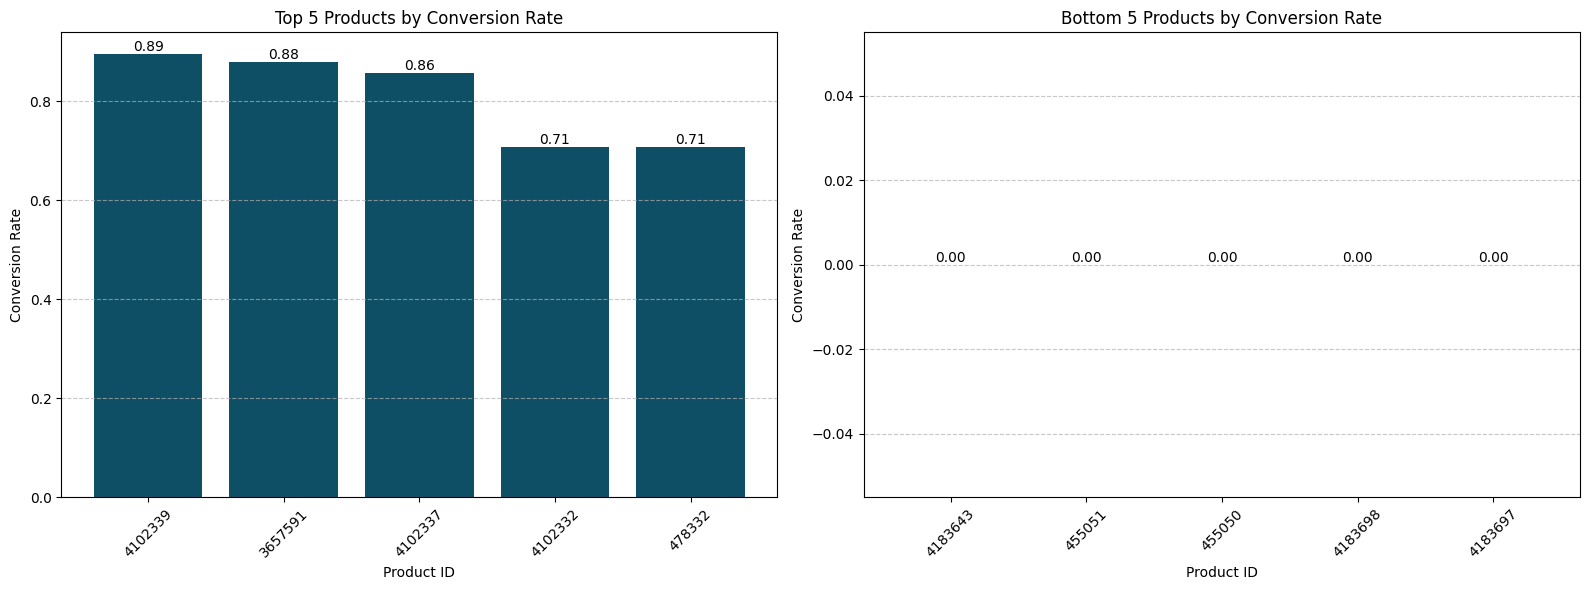

In [18]:
top_products.index = top_products.index.astype(str)
bottom_products.index = bottom_products.index.astype(str)

plt.figure(figsize=(16, 6))  

# Plot 1: Top 5
plt.subplot(1, 2, 1)
bars1 = plt.bar(top_products.index, top_products['conversion_rate'], color='#0e4f66')
plt.title('Top 5 Products by Conversion Rate')
plt.xlabel('Product ID')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Plot 1: Bottom 5
plt.subplot(1, 2, 2)
bars2 = plt.bar(bottom_products.index, bottom_products['conversion_rate'], color='#0e4f66')
plt.title('Bottom 5 Products by Conversion Rate')
plt.xlabel('Product ID')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Top 5 sản phẩm có tỷ lệ chuyển đổi cao dao động từ `0.71` đến `0.89`, cho thấy các sản phẩm này thu hút và thuyết phục khách hàng hiệu quả. Đặc biệt, sản phẩm ID `410239` đạt tỷ lệ chuyển đổi cao nhất (0.89).

Bottom 5 sản phẩm đều có tỷ lệ chuyển đổi bằng `0.00`, nghĩa là không có lượt chuyển đổi nào mặc dù có lượt truy cập. Điều này cho thấy các sản phẩm này có thể gặp vấn đề về nội dung, giá cả, hình ảnh, hoặc không phù hợp với nhu cầu khách hàng.

Sự chênh lệch rõ rệt giữa nhóm top và bottom là dấu hiệu cần xem xét lại chiến lược bán hàng hoặc marketing cho nhóm sản phẩm có hiệu suất thấp.

### Top 10 thương hiệu có Conversion Rate cao nhất

In [19]:
events_by_brand = data.groupby(['brand', 'event_type']).size().unstack(fill_value=0)
events_by_brand = events_by_brand[events_by_brand['view'] > 14]
events_by_brand['conversion_rate'] = events_by_brand['purchase'] / events_by_brand['view'].replace(0, pd.NA)
events_by_brand

event_type,cart,purchase,view,conversion_rate
brand,,,,
a-data,1,1,60,0.016667
accord,162,110,1427,0.077085
acecamp,3,2,38,0.052632
acer,35,27,766,0.035248
acmepower,6,8,110,0.072727
...,...,...,...,...
zhengte,0,0,106,0.000000
zhongdi,2,0,123,0.000000
zis,1,0,17,0.000000


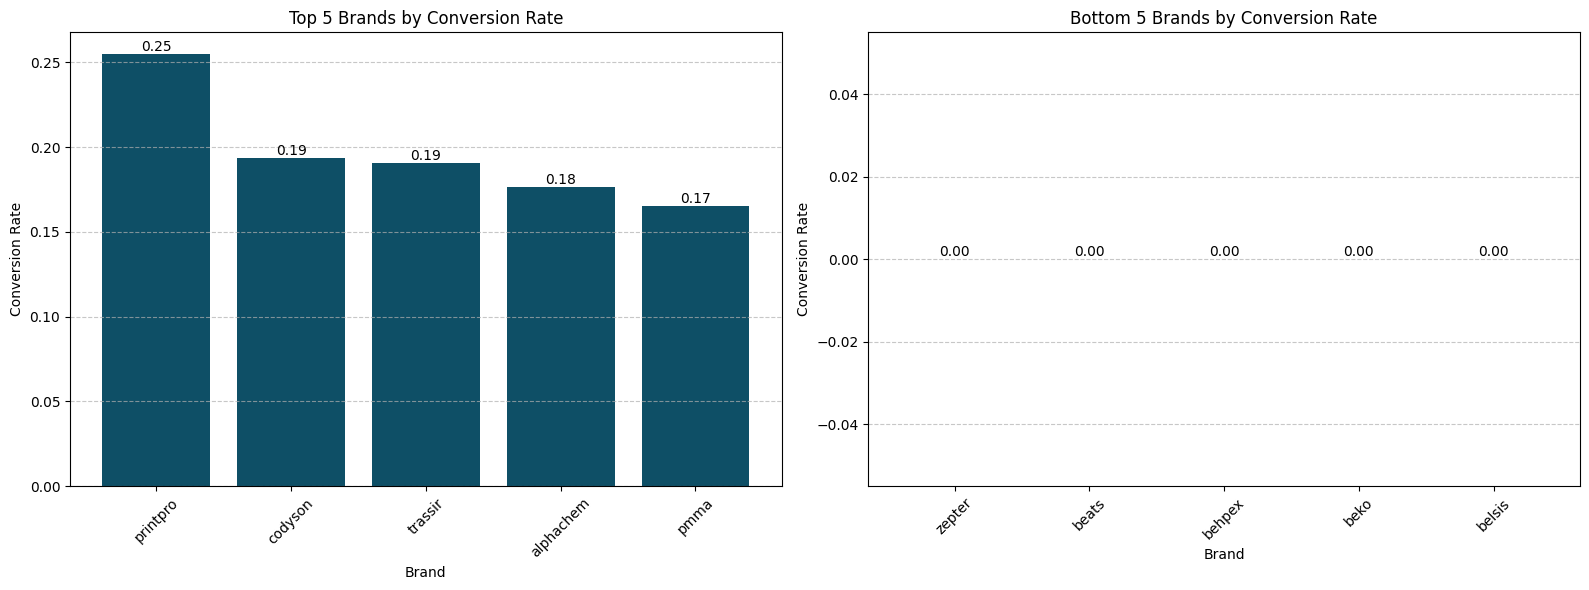

In [20]:
top_brands = events_by_brand.sort_values(by='conversion_rate', ascending=False).head(5)
bottom_brands = events_by_brand.sort_values(by='conversion_rate', ascending=True).head(5)

plt.figure(figsize=(16, 6))  

# Plot 1: Top 5 brands
plt.subplot(1, 2, 1)
bars1 = plt.bar(top_brands.index, top_brands['conversion_rate'], color='#0e4f66')
plt.title('Top 5 Brands by Conversion Rate')
plt.xlabel('Brand')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Plot 2: Bottom 5 brands
plt.subplot(1, 2, 2)
bars2 = plt.bar(bottom_brands.index, bottom_brands['conversion_rate'], color='#0e4f66')
plt.title('Bottom 5 Brands by Conversion Rate')
plt.xlabel('Brand')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Top 5 thương hiệu có tỷ lệ chuyển đổi cao nhất dao động từ `0.17` đến `0.25`. Trong đó, thương hiệu `printpro` dẫn đầu với tỷ lệ 0.25, cho thấy khả năng thuyết phục khách hàng tốt hơn hẳn so với các thương hiệu còn lại.

Các thương hiệu khác như codyson, tassir, và alphachem cũng duy trì tỷ lệ ổn định (khoảng 0.18–0.19), chứng tỏ sức hút sản phẩm khá tốt.

Bottom 5 thương hiệu (zepter, beats, beko, beisis, behrpex) đều có tỷ lệ chuyển đổi bằng `0.00`, tức là không có khách nào mua hàng dù có lượt truy cập. Điều này cho thấy các thương hiệu này đang gặp vấn đề nghiêm trọng về hiệu quả kinh doanh.

**Khuyến nghị**: Nên xem xét lại cách trình bày, mô tả sản phẩm, chính sách giá hoặc chiến lược marketing cho các thương hiệu có hiệu suất thấp, đồng thời đẩy mạnh quảng bá cho các thương hiệu đang có tỷ lệ chuyển đổi cao.

### Phễu chuyển đổi View → Cart → Purchase

In [21]:
funnel = data.pivot_table(
    index='user_session',
    columns='event_type',
    values='product_id',
    aggfunc='count'
).fillna(0)

funnel


event_type,cart,purchase,view
user_session,,,
000AMhYaQu,0.0,0.0,1.0
000c34fa-991f-442a-8e07-8c472269bec6,0.0,0.0,1.0
001HttdHUk,0.0,0.0,1.0
001P7lK0Pt,0.0,0.0,2.0
001RxUtFJa,0.0,0.0,1.0
...,...,...,...
zzxngTdVaG,0.0,0.0,1.0
zzy0qXtxYX,0.0,0.0,1.0
zzy6W7KylP,0.0,0.0,1.0


In [22]:
# Tổng số view, cart, purchase
total_view = (funnel['view'] > 0).sum()
total_cart = (funnel['cart'] > 0).sum() if 'cart' in funnel.columns else 0
total_purchase = (funnel['purchase'] > 0).sum() if 'purchase' in funnel.columns else 0

# Tính tỷ lệ
cart_rate = total_cart / total_view * 100 if total_view > 0 else 0
purchase_rate = total_purchase / total_cart * 100 if total_cart > 0 else 0

print(f"Tổng sessions có view: {total_view}")
print(f"Tổng sessions có cart: {total_cart} → {cart_rate:.2f}% từ view")
print(f"Tổng sessions có purchase: {total_purchase} → {purchase_rate:.2f}% từ cart")

Tổng sessions có view: 488360
Tổng sessions có cart: 41270 → 8.45% từ view
Tổng sessions có purchase: 24344 → 58.99% từ cart


In [23]:
import plotly.express as px

funnel_data = {
    'Stage': ['View', 'Cart', 'Purchase'],
    'Sessions': [total_view, total_cart, total_purchase],
    'Conversion Rate': [100, cart_rate, purchase_rate]
}

import pandas as pd
funnel_df = pd.DataFrame(funnel_data)

fig = px.funnel(funnel_df, x='Sessions', y='Stage', 
                title='Funnel Analysis: View → Cart → Purchase',
                labels={'Sessions': 'Total Sessions', 'Stage': 'Event Stage'})

max_x = max(funnel_df['Sessions'])

for i, row in funnel_df.iterrows():
    fig.add_annotation(
        x=row['Sessions'] + max_x * 0.06, 
        y=row['Stage'],
        text=f'{row["Conversion Rate"]:.2f}%', 
        showarrow=False,
        font=dict(size=12, color='black')
    )

fig.update_layout(
    title="Funnel Analysis: View → Cart → Purchase",
    title_x=0.5,
    font=dict(size=12, family='Arial'),
    width=1300,   
    height=600    
)

fig.show()

Tỷ lệ chuyển đổi từ View → Cart `rất thấp` (8.45%)
→ Có tới hơn `91%` người xem sản phẩm nhưng `không thêm vào giỏ hàng`, điều này gợi ý:
- Nội dung sản phẩm, hình ảnh hoặc mô tả chưa đủ hấp dẫn.
- Giá hoặc thông tin sản phẩm chưa phù hợp.
- Trải nghiệm người dùng (UX) khi thêm vào giỏ còn rườm rà.

Tỷ lệ chuyển đổi từ Cart → Purchase lại `khá cao` (58.99%)
→ Một khi người dùng đã thêm vào giỏ, khả năng họ mua rất lớn, cho thấy:
- Quy trình thanh toán đang hoạt động hiệu quả.
- Người dùng thực sự có ý định mua khi đã vào bước giỏ hàng.

Điểm nghẽn chính nằm ở bước `View → Cart`
=> Đây là khâu then chốt cần cải thiện nếu muốn tăng doanh thu: có thể đưa ra chiến lược đổi mới hình ảnh sản phẩm, tăng CTA rõ ràng, gợi ý combo, giảm giá, review khách hàng...

### Sản phẩm đắt tiền có chuyển đổi thấp hơn?

C:\Users\EliteBook 640 G11\AppData\Local\Temp\ipykernel_15444\4246594465.py:5: RuntimeWarning:

divide by zero encountered in scalar divide

C:\Users\EliteBook 640 G11\AppData\Local\Temp\ipykernel_15444\4246594465.py:7: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



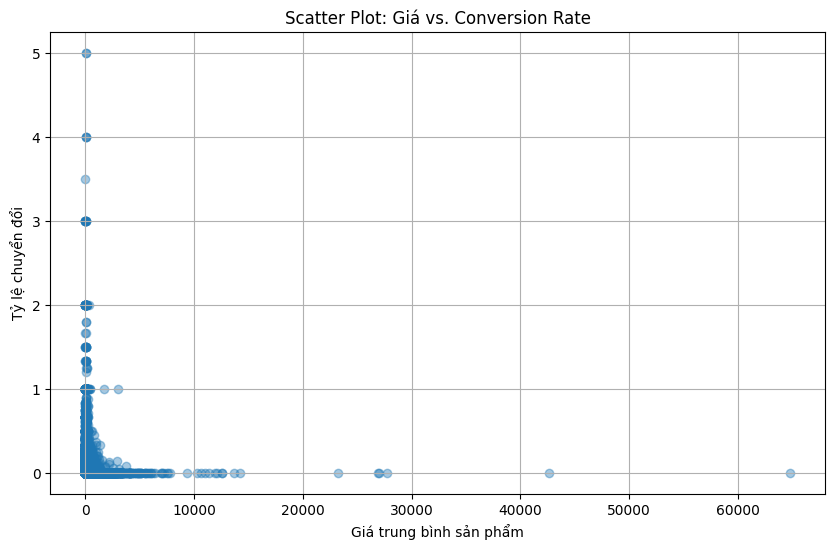

In [24]:
import matplotlib.pyplot as plt

# Tính conversion rate theo sản phẩm
def calc_conversion(df):
    return (df['event_type'] == 'purchase').sum() / (df['event_type'] == 'view').sum()

product_cr = data.groupby('product_id').apply(calc_conversion).reset_index(name='conversion_rate')

product_price = data.groupby('product_id')['price'].mean().reset_index()
product_stats = pd.merge(product_cr, product_price, on='product_id')

# Vẽ biểu đồ scatter
plt.figure(figsize=(10, 6))
plt.scatter(product_stats['price'], product_stats['conversion_rate'], alpha=0.4)
plt.xlabel('Giá trung bình sản phẩm')
plt.ylabel('Tỷ lệ chuyển đổi')
plt.title('Scatter Plot: Giá vs. Conversion Rate')
plt.grid(True)

plt.show()

Chúng ta thấy mối quan hệ nghịch đảo rõ ràng:

- Khi `giá trung bình` sản phẩm tăng, `tỷ lệ chuyển đổi` (conversion rate) giảm rõ rệt.

- Đa số các sản phẩm có giá trung bình dưới 1.000 đạt tỷ lệ chuyển đổi cao hơn.

Cụm dữ liệu dày đặc ở giá thấp:

- Phần lớn sản phẩm tập trung trong khoảng giá từ 0 đến 2.000, cho thấy người dùng có xu hướng tương tác nhiều hơn với `các sản phẩm giá rẻ`.

Tỷ lệ chuyển đổi gần như bằng 0 ở mức giá cao:

- Các sản phẩm có `giá >10.000` gần như `không có` chuyển đổi (conversion rate ≈ 0), chứng tỏ rào cản giá cao `ảnh hưởng lớn` đến `hành vi mua hàng`.

Một số ngoại lệ:

- Có vài điểm lẻ với `tỷ lệ chuyển đổi cao` ở `giá thấp` có thể là những sản phẩm hot, sale mạnh, hoặc thương hiệu mạnh.